<a href="https://www.kaggle.com/code/vtinnguyn/b-i-t-p?scriptVersionId=91732609" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/baitap/iris.csv


In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("/kaggle/input/baitap/iris.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Text(0, 0.5, 'sepal.width')

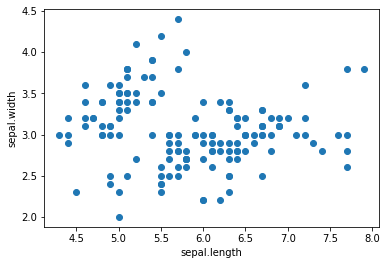

In [4]:
plt.scatter(df['sepal.length'], df['sepal.width'])
plt.xlabel('sepal.length')
plt.ylabel('sepal.width')

In [5]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['sepal.length','sepal.width']])
y_predicted
df['cluster']=y_predicted
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,cluster
0,5.1,3.5,1.4,0.2,Setosa,1
1,4.9,3.0,1.4,0.2,Setosa,1
2,4.7,3.2,1.3,0.2,Setosa,1
3,4.6,3.1,1.5,0.2,Setosa,1
4,5.0,3.6,1.4,0.2,Setosa,1


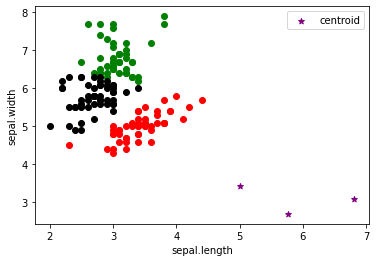

In [6]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['sepal.width'],df1['sepal.length'],color='green')
plt.scatter(df2['sepal.width'],df2['sepal.length'],color='red')
plt.scatter(df3['sepal.width'],df3['sepal.length'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('sepal.length')
plt.ylabel('sepal.width')
plt.legend()

In [7]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['sepal.length','sepal.width']])
    sse.append(km.inertia_)

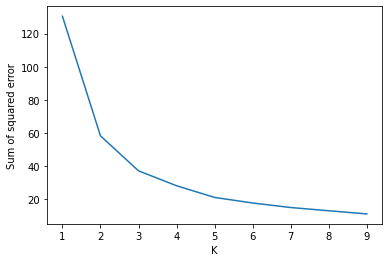

In [8]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

Text(0, 0.5, 'petal.width')

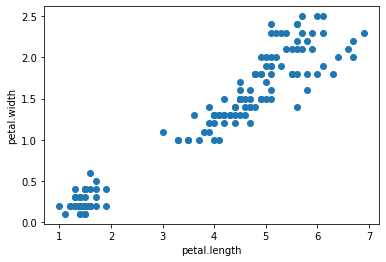

In [9]:
plt.scatter(df['petal.length'], df['petal.width'])
plt.xlabel('petal.length')
plt.ylabel('petal.width')

In [10]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal.length','petal.width']])
y_predicted
df['cluster']=y_predicted
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,cluster
0,5.1,3.5,1.4,0.2,Setosa,1
1,4.9,3.0,1.4,0.2,Setosa,1
2,4.7,3.2,1.3,0.2,Setosa,1
3,4.6,3.1,1.5,0.2,Setosa,1
4,5.0,3.6,1.4,0.2,Setosa,1


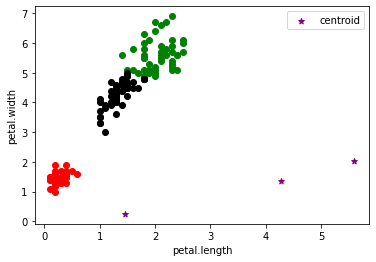

In [11]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['petal.width'],df1['petal.length'],color='green')
plt.scatter(df2['petal.width'],df2['petal.length'],color='red')
plt.scatter(df3['petal.width'],df3['petal.length'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('petal.length')
plt.ylabel('petal.width')
plt.legend()

In [12]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal.length','petal.width']])
    sse.append(km.inertia_)

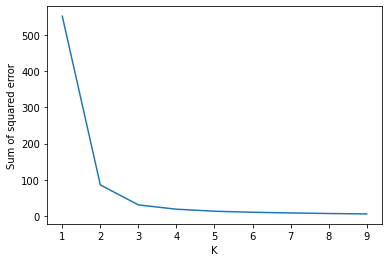

In [13]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)